# Data Profiling

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for feature engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# for preprocessing modelling 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load Dataset**

In [2]:
# data from titanic is good for learn for basic
df = pd.read_csv("Titanic.csv")

**Preview Dataset**

In [3]:
# view top data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Info Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


^ Complete data (**entries**) reaches 891 (**0 to 890**), if there is a number below 891, it means that the data has a missing value. How many total missing values ​​are there? can use isna sum

**Check Missing Value**

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From here it can be seen that the missing value data is in the **Age**, **Cabin**, and **Embarked** columns.

Data cleansing is not only in missing values, but also in data types (**Dtype**)

^ It can be seen that **Age float64** data, **PassengerId int64** data, coincidentally this titanic data is correct

Sometimes in the original data, we have to change also cover it

For example, it happens a lot, Age data type is Object, we have to change it to numeric first

# Data Cleansing

**Column Age**

<AxesSubplot:ylabel='Frequency'>

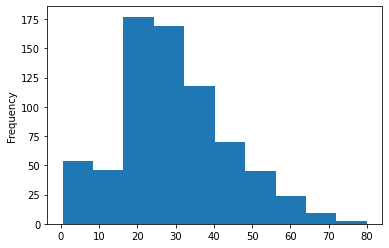

In [6]:
df["Age"].plot(kind="hist")

if you want to clean missing numeric data values, for example **Age**, see first

seen from the distribution of skewness curtosis

here we can use the median

In [7]:
val = df["Age"].median()
df["Age"] = df["Age"].fillna(val)

we recheck the missing value data, especially in Age

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

^ Already 0, it means that the data in Age is 0, it means that the missing value in Age has been completed

Cabin, categorical data

let's see first

In [9]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

   * too many uniques, and
   * cabin column is not very influential in predicting the condition of life or death of passengers, as well as
   * it's too dummy, it can only be filled in with type B96 B98, all data is null, imagine 687 empty data, we fill in cabin B89
    
then we better delete the column

In [10]:
df.drop("Cabin", axis = 1, inplace = True) 

^ use True to keep it deleted even if it calls df again

and not only temporarily lost

we try to call back the info data, the **Cabin** data should no longer exist

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


then we check again whether there are still missing values ​​in the data set?

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

^ there is still missing value data in Embarked
because the data missing value is only 2 and the type is categorical, we can use mode

but we don't fill all missing value data with mode, we can also use new uniq

**Column Embarked**

In [13]:
df["Embarked"] = df.Embarked.fillna("Unknown")

In [14]:
df["Embarked"].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

**Column SibSp and Column Parch**

if we look at the data, the meaning of SibSp is, the person brought a partner or relative?

and for Parch whether the passenger brings parents or not

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


there will be too many columns if there are SibSp and Parch and also redundant. then you can create a new column

In [16]:
df["Alone"] = df["SibSp"]+df["Parch"]

In [17]:
df["Alone"][df["Alone"]>0] = "With Family"
df["Alone"][df["Alone"]==0]= "Without Family"

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


the meaning of the Alone column, if SibSp and Parch are the same 0, it means Without Family

if one of the SibSp or Parch columns is not equal to 0, then With Family